### Importing packages

In [1]:
%pylab
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


### Importing data

In [2]:
data_tr = pd.read_csv('trainMerged.csv')

In [3]:
data_tes = pd.read_csv('testMerged.csv')

In [4]:
data_tr.head()

,Store,Date,IsHoliday,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,10,2010-02-05,False,1,40212.84,B,126512,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765
1,10,2010-02-05,False,98,74.00,B,126512,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765
2,10,2010-02-05,False,32,26116.73,B,126512,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765
3,10,2010-02-05,False,25,20779.50,B,126512,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765
4,10,2010-02-05,False,34,50585.42,B,126512,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765


### Converting categorical data to numeric for easier operations

#### for train

In [5]:
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [6]:
for c_feature in ['Type' ]:
    data_tr[c_feature] = data_tr[c_feature].astype('category')
    data_tr = create_dummies(data_tr , c_feature )

In [7]:
data_tr.head()

,Store,Date,IsHoliday,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type_B,Type_C
0,10,2010-02-05,False,1,40212.84,126512,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765,1,0
1,10,2010-02-05,False,98,74.00,126512,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765,1,0
2,10,2010-02-05,False,32,26116.73,126512,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765,1,0
3,10,2010-02-05,False,25,20779.50,126512,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765,1,0
4,10,2010-02-05,False,34,50585.42,126512,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765,1,0


In [8]:
data_tr[["IsHoliday"]] *= 1

In [9]:
data_tr.head()

,Store,Date,IsHoliday,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type_B,Type_C
0,10,2010-02-05,0,1,40212.84,126512,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765,1,0
1,10,2010-02-05,0,98,74.00,126512,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765,1,0
2,10,2010-02-05,0,32,26116.73,126512,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765,1,0
3,10,2010-02-05,0,25,20779.50,126512,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765,1,0
4,10,2010-02-05,0,34,50585.42,126512,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765,1,0


#### for test

In [10]:
for c_feature in ['Type' ]:
    data_tes[c_feature] = data_tes[c_feature].astype('category')
    data_tes = create_dummies(data_tes , c_feature )

In [11]:
data_tes[["IsHoliday"]] *= 1

In [12]:
data_tes.head()

,Store,Date,IsHoliday,Dept,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type_B,Type_C
0,10,2012-11-02,0,1,126512,70.79,4.099,25680.2,6037.06,44.68,17412.04,4223.05,131.236226,6.943,1,0
1,10,2012-11-02,0,72,126512,70.79,4.099,25680.2,6037.06,44.68,17412.04,4223.05,131.236226,6.943,1,0
2,10,2012-11-02,0,71,126512,70.79,4.099,25680.2,6037.06,44.68,17412.04,4223.05,131.236226,6.943,1,0
3,10,2012-11-02,0,21,126512,70.79,4.099,25680.2,6037.06,44.68,17412.04,4223.05,131.236226,6.943,1,0
4,10,2012-11-02,0,67,126512,70.79,4.099,25680.2,6037.06,44.68,17412.04,4223.05,131.236226,6.943,1,0


In [13]:
data_tr.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type_B,Type_C
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,0.387824,0.101044
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,0.487255,0.301387
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,0.000000,0.000000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,0.000000,0.000000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,0.000000,0.000000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,1.000000,0.000000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,1.000000,1.000000


In [14]:
data_tes.describe()

,Store,Dept,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type_B,Type_C
count,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,114915.000000,86437.000000,105235.000000,102176.000000,115064.000000,76902.000000,76902.000000,115064.000000,115064.000000
mean,22.238207,44.339524,136497.688921,53.941804,3.581546,7689.216439,3734.051729,2403.088666,3356.219071,3922.681189,176.961347,6.868733,0.386741,0.102995
std,12.809930,30.656410,61106.926438,18.724153,0.239442,10698.760716,8323.495014,13767.939313,7570.501545,19445.150745,41.239967,1.583427,0.487006,0.303953
min,1.000000,1.000000,34875.000000,-7.290000,2.872000,-2781.450000,-35.740000,-179.260000,0.220000,-185.170000,131.236226,3.684000,0.000000,0.000000
25%,11.000000,18.000000,93638.000000,39.820000,3.431000,1966.460000,180.350000,15.100000,155.460000,1309.300000,138.402033,5.771000,0.000000,0.000000
50%,22.000000,37.000000,140167.000000,54.470000,3.606000,4842.290000,742.590000,78.260000,840.940000,2390.430000,192.304445,6.806000,0.000000,0.000000
75%,33.000000,74.000000,202505.000000,67.350000,3.766000,9439.140000,2735.670000,272.580000,3096.920000,4227.270000,223.244532,8.036000,1.000000,0.000000
max,45.000000,99.000000,219622.000000,101.950000,4.125000,103184.980000,71074.170000,149483.310000,65344.640000,771448.100000,228.976456,10.199000,1.000000,1.000000


In [15]:
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
Store           421570 non-null int64
Date            421570 non-null object
IsHoliday       421570 non-null object
Dept            421570 non-null int64
Weekly_Sales    421570 non-null float64
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Type_B          421570 non-null uint8
Type_C          421570 non-null uint8
dtypes: float64(10), int64(3), object(2), uint8(2)
memory usage: 49.0+ MB


#### almost 75 % data missing in markdown data.. soo we will try to use linear regression to fill null values

In [16]:
temp = data_tr.drop(columns  = ['Weekly_Sales'])
temp.head()

,Store,Date,IsHoliday,Dept,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type_B,Type_C
0,10,2010-02-05,0,1,126512,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765,1,0
1,10,2010-02-05,0,98,126512,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765,1,0
2,10,2010-02-05,0,32,126512,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765,1,0
3,10,2010-02-05,0,25,126512,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765,1,0
4,10,2010-02-05,0,34,126512,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765,1,0


In [17]:
data_combine = pd.concat([temp,data_tes], axis = 0)

In [18]:
data_combine = data_combine.dropna()
data_combine.head()

,Store,Date,IsHoliday,Dept,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type_B,Type_C
6669,10,2011-11-11,0,41,126512,55.28,3.677,13444.17,14909.99,752.18,4320.22,5896.3,129.81671,7.874,1,0
6670,10,2011-11-11,0,83,126512,55.28,3.677,13444.17,14909.99,752.18,4320.22,5896.3,129.81671,7.874,1,0
6671,10,2011-11-11,0,58,126512,55.28,3.677,13444.17,14909.99,752.18,4320.22,5896.3,129.81671,7.874,1,0
6672,10,2011-11-11,0,71,126512,55.28,3.677,13444.17,14909.99,752.18,4320.22,5896.3,129.81671,7.874,1,0
6673,10,2011-11-11,0,13,126512,55.28,3.677,13444.17,14909.99,752.18,4320.22,5896.3,129.81671,7.874,1,0


#### dropping irrelevant columns from data

In [19]:
X = data_combine.drop(['Date', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'], axis=1)

In [20]:
Y1 = data_combine.MarkDown1
Y2 = data_combine.MarkDown2
Y3 = data_combine.MarkDown3
Y4 = data_combine.MarkDown4
Y5 = data_combine.MarkDown5

In [21]:
l1 = LinearRegression().fit(X,Y1)

In [22]:
l2 = LinearRegression().fit(X,Y2)

In [23]:
l3 = LinearRegression().fit(X,Y3)

In [24]:
l4 = LinearRegression().fit(X,Y4)

In [25]:
l5 = LinearRegression().fit(X,Y5)

#### now using model to input missing values 

##### for train

In [26]:
data_tr.MarkDown1 = np.where(data_tr.MarkDown1.isnull() == 1, l1.predict(data_tr[X.columns]), data_tr.MarkDown1)

In [27]:
data_tr.MarkDown2 = np.where(data_tr.MarkDown2.isnull() == 1, l2.predict(data_tr[X.columns]), data_tr.MarkDown2)

In [28]:
data_tr.MarkDown3 = np.where(data_tr.MarkDown3.isnull() == 1, l3.predict(data_tr[X.columns]), data_tr.MarkDown3)

In [29]:
data_tr.MarkDown4 = np.where(data_tr.MarkDown4.isnull() == 1, l4.predict(data_tr[X.columns]), data_tr.MarkDown4)

In [30]:
data_tr.MarkDown5 = np.where(data_tr.MarkDown5.isnull() == 1, l5.predict(data_tr[X.columns]), data_tr.MarkDown5)

In [31]:
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
Store           421570 non-null int64
Date            421570 non-null object
IsHoliday       421570 non-null object
Dept            421570 non-null int64
Weekly_Sales    421570 non-null float64
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       421570 non-null float64
MarkDown2       421570 non-null float64
MarkDown3       421570 non-null float64
MarkDown4       421570 non-null float64
MarkDown5       421570 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Type_B          421570 non-null uint8
Type_C          421570 non-null uint8
dtypes: float64(10), int64(3), object(2), uint8(2)
memory usage: 49.0+ MB


##### for tests

In [32]:
data_tes.MarkDown1 = np.where(data_tes.MarkDown1.isnull() == 1, l1.predict(data_tes[X.columns]), data_tes.MarkDown1)
data_tes.MarkDown2 = np.where(data_tes.MarkDown2.isnull() == 1, l2.predict(data_tes[X.columns]), data_tes.MarkDown2)
data_tes.MarkDown3 = np.where(data_tes.MarkDown3.isnull() == 1, l3.predict(data_tes[X.columns]), data_tes.MarkDown3)
data_tes.MarkDown4 = np.where(data_tes.MarkDown4.isnull() == 1, l4.predict(data_tes[X.columns]), data_tes.MarkDown4)
data_tes.MarkDown5 = np.where(data_tes.MarkDown5.isnull() == 1, l5.predict(data_tes[X.columns]), data_tes.MarkDown5)

### Outlier treatment

In [33]:
data_tr.Weekly_Sales.quantile(0.99)

106479.58599999998

#### capping data to 99 percentile 

In [34]:
data_tr.Weekly_Sales = np.where(data_tr.Weekly_Sales > 106479.58,106479.58, data_tr.Weekly_Sales )

### Splitting train data further for train test

In [35]:
data_tr.head()

,Store,Date,IsHoliday,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type_B,Type_C
0,10,2010-02-05,0,1,40212.84,126512,54.34,2.962,6285.176066,8133.069509,573.758137,3813.282733,5021.554846,126.442065,9.765,1,0
1,10,2010-02-05,0,98,74.00,126512,54.34,2.962,6313.978400,8117.818520,635.631794,3859.667151,5044.047816,126.442065,9.765,1,0
2,10,2010-02-05,0,32,26116.73,126512,54.34,2.962,6294.380935,8128.195482,593.532192,3828.106620,5028.743321,126.442065,9.765,1,0
3,10,2010-02-05,0,25,20779.50,126512,54.34,2.962,6292.302416,8129.296068,589.067083,3824.759290,5027.120117,126.442065,9.765,1,0
4,10,2010-02-05,0,34,50585.42,126512,54.34,2.962,6294.974798,8127.881028,594.807938,3829.062999,5029.207093,126.442065,9.765,1,0


#### dropping irrelevant variables

In [36]:
X1 = data_tr.drop(columns=  ['Date','CPI', 'Unemployment', 'Weekly_Sales' ])

In [37]:
Y1 = data_tr.Weekly_Sales

In [38]:
X1 = X1.dropna()
Y1 = Y1.dropna()

#### Model building

In [39]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X1, Y1, train_size=0.70, random_state=1)

C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [40]:
result = LinearRegression().fit(Xtrain,Ytrain)

#### comparing accracy with RMSE 

In [45]:
from sklearn import metrics
print('RMSE for train:', np.sqrt(metrics.mean_squared_error((Ytrain), (result.predict(Xtrain)))))
print('RMSE for test:', np.sqrt(metrics.mean_squared_error((Ytest), (result.predict(Xtest)))))

RMSE for train: 19838.31747298939
RMSE for test: 19784.346091062158


### residuals following normal distribution

Populating the interactive namespace from numpy and matplotlib


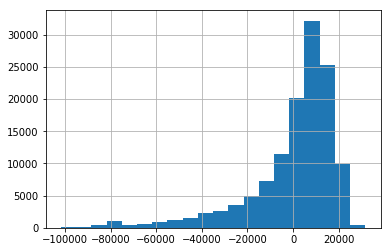

In [46]:
import matplotlib.pyplot as plt
%pylab inline
plt.rcParams['figure.figsize'] = 6, 4
plt.rcParams['axes.grid'] = True
plt.gray()
(result.predict(Xtest) - Ytest).hist(bins =20)

## Decision tree

In [40]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [63]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X1, Y1, train_size=0.70, random_state=1)

C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [199]:
param_grid = {'max_depth':[4,5,6,7],                           #parameters
              'min_samples_split':[100,125,110,120]}

In [202]:
treedt = GridSearchCV(tree.DecisionTreeRegressor(), param_grid, cv = 5)
treedt.fit( Xtrain, Xtrain )

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [4, 5, 6, 7], 'min_samples_split': [100, 125, 110, 120]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [203]:
treedt.best_params_

{'max_depth': 7, 'min_samples_split': 100}

In [205]:
model = tree.DecisionTreeRegressor(criterion='mse', max_depth= 7, min_samples_split = 100)  #fine tuning the model

model.fit(Xtrain, Ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=100, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [207]:
print('RMSE train :', np.sqrt(metrics.mean_squared_error(Ytrain, model.predict(Xtrain))))
print('RMSE test :', np.sqrt(metrics.mean_squared_error(Ytest, model.predict(Xtest))))

RMSE train : 9996.164387379407
RMSE test : 10003.862694943145


### Most important features as per DT

In [46]:
import seaborn as sn

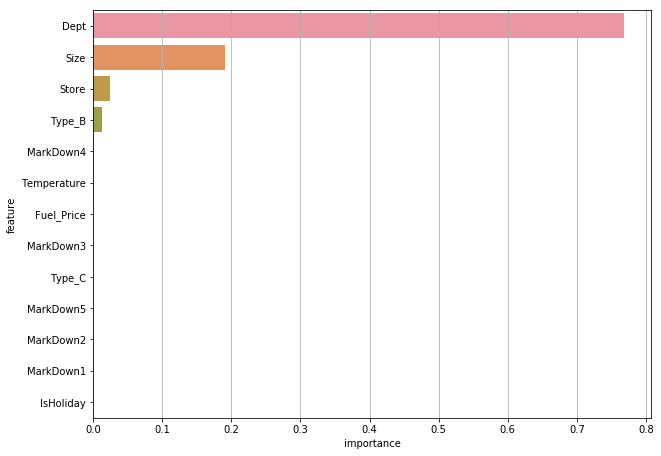

In [209]:
import seaborn as sn
indices = np.argsort(model.feature_importances_)[::-1]
feature_rank = pd.DataFrame(columns = ['rank', 'feature', 'importance'])
for f in range (Xtrain.shape[1]):
    feature_rank.loc[f] = [f+1, Xtrain.columns[indices[f]], model.feature_importances_[indices[f]]]
sn.barplot(y = 'feature', x = 'importance', data = feature_rank[0:20]) 

### RANDOM FOREST

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
RandomForestRegressor?

In [72]:
param_grid = {'n_estimators': [100,200,300], 'min_samples_leaf': [50,75,100], 'n_jobs' :[-1]}

In [73]:
rf = GridSearchCV(RandomForestRegressor(), param_grid, cv = 3)
rf.fit( Xtrain, Ytrain )

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 200, 300], 'min_samples_leaf': [50, 75, 100], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [74]:
rf.best_params_

{'min_samples_leaf': 50, 'n_estimators': 300, 'n_jobs': -1}

In [43]:
reg_ran = RandomForestRegressor(
 min_samples_leaf= 50,
 n_estimators= 300)
reg_ran.fit( Xtrain, Ytrain )

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=50, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [44]:
print('RMSE train :', np.sqrt(metrics.mean_squared_error(Ytrain, reg_ran.predict(Xtrain))))
print('RMSE test :', np.sqrt(metrics.mean_squared_error(Ytest, reg_ran.predict(Xtest))))

RMSE train : 4905.596032836319
RMSE test : 5138.075348131852


In [56]:
print('RMSE train :', (metrics.mean_absolute_error(Ytrain, reg_ran.predict(Xtrain))))
print('RMSE test :', (metrics.mean_absolute_error(Ytest, reg_ran.predict(Xtest))))

RMSE train : 2289.3698920475945
RMSE test : 2370.5216314109907


In [57]:
print('RMSE train :', (metrics.mean_squared_error(Ytrain, reg_ran.predict(Xtrain))))
print('RMSE test :', (metrics.mean_squared_error(Ytest, reg_ran.predict(Xtest))))

RMSE train : 24064872.437379435
RMSE test : 26399818.283080246


#### Residual Distribution

Populating the interactive namespace from numpy and matplotlib


C:\Users\thebu\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'indices']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


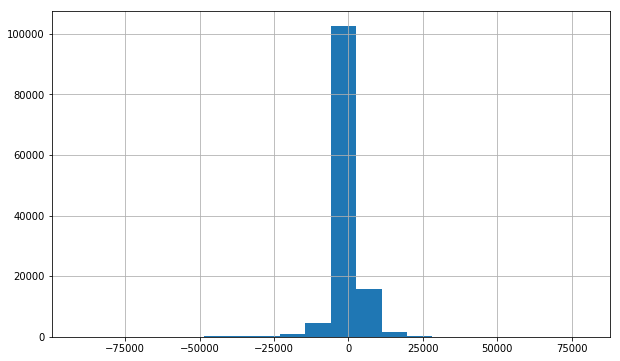

In [59]:
import matplotlib.pyplot as plt
%pylab inline
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.grid'] = True
plt.gray()
(reg_ran.predict(Xtest) - Ytest).hist(bins =20)

#### Decile Analysis

In [65]:
Xtrain['y_pred_train'] = reg_ran.predict(Xtrain)
Xtest['y_pred_test'] = reg_ran.predict(Xtest)
Xtrain['y_pred_train'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
Xtrain['Deciles']=pd.qcut(Xtrain['y_pred_train'],10, labels=False)
Xtest['Deciles']=pd.qcut(Xtest['y_pred_test'],10, labels=False)
Xtrain['actual_value'] = Ytrain
Xtest['actual_value'] = Ytest
df3 = Xtrain[['Deciles','actual_value', 'y_pred_train']].groupby(Xtrain.Deciles).mean()
df4 = Xtest[['Deciles','actual_value', 'y_pred_test']].groupby(Xtest.Deciles).mean()

C:\Users\thebu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\thebu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\thebu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [69]:
df3

,Deciles,actual_value,y_pred_train
Deciles,,,
0,0,135.737877,148.701371
1,1,937.870680,989.402211
2,2,2333.135893,2418.579617
3,3,4109.706651,4182.380439
4,4,6452.128995,6598.091393
5,5,9678.854159,9778.980920
6,6,14157.826895,14351.536270
7,7,20624.410596,20693.774784
8,8,32875.862692,32540.033270


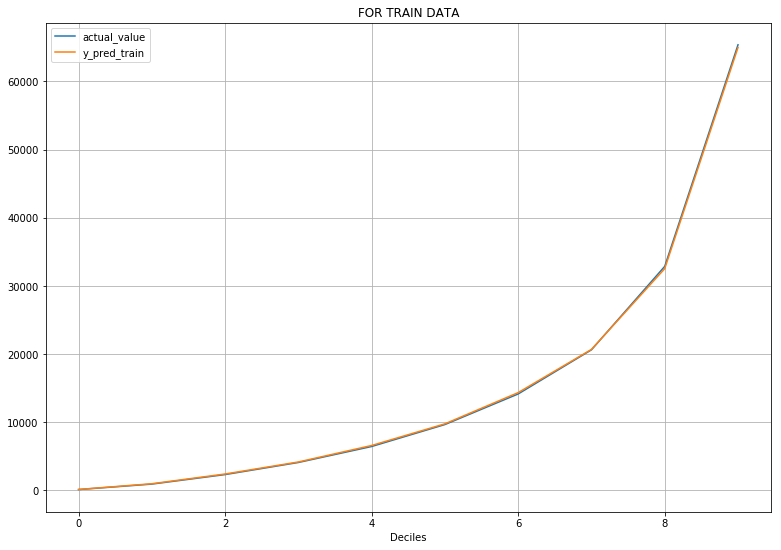

In [56]:
df3[-15:].plot(x='Deciles', y=['actual_value','y_pred_train']  ,figsize=(13,9), grid=True , title = 'FOR TRAIN DATA' )

In [72]:
df4

,Deciles,actual_value,y_pred_test
Deciles,,,
0,0,145.071124,154.702910
1,1,984.462722,1020.529574
2,2,2380.238563,2460.303729
3,3,4141.400046,4213.411035
4,4,6468.547332,6631.084355
5,5,9701.270963,9840.448033
6,6,14197.094326,14354.044728
7,7,20613.119122,20739.184080
8,8,32620.276941,32388.254651


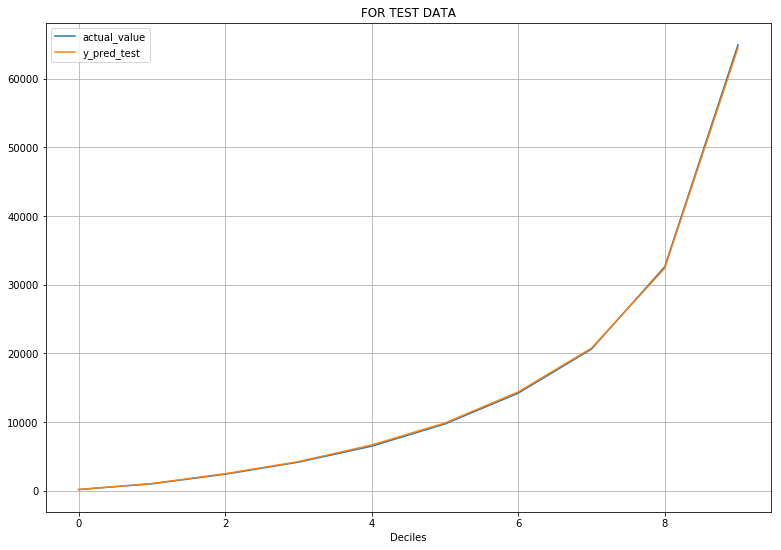

In [57]:
df4[-15:].plot(x='Deciles', y=['actual_value','y_pred_test']  ,figsize=(13,9), grid=True ,title = 'FOR TEST DATA'  )

#### Variable Importance Plot

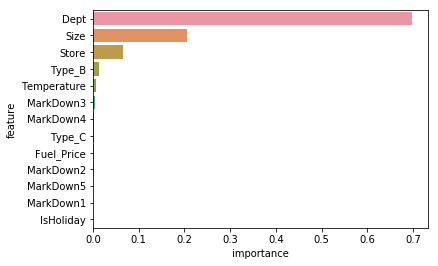

In [58]:
import seaborn as sn
indices = np.argsort(reg_ran.feature_importances_)[::-1]
feature_rank = pd.DataFrame(columns = ['rank', 'feature', 'importance'])
for f in range (Xtrain.shape[1]):
    feature_rank.loc[f] = [f+1, Xtrain.columns[indices[f]], reg_ran.feature_importances_[indices[f]]]
sn.barplot(y = 'feature', x = 'importance', data = feature_rank[0:20]) 

### ADABOOST

In [54]:
from sklearn.ensemble import AdaBoostRegressor

In [65]:
AdaBoostRegressor?

In [72]:
param_grid = {'n_estimators':[60], 'learning_rate':[1,1.2,1.1]}

In [75]:
ab = GridSearchCV(AdaBoostRegressor(), param_grid, cv = 5)
ab.fit( Xtrain, Ytrain )

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [60], 'learning_rate': [1, 1.2, 1.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [76]:
ab.best_params_

{'learning_rate': 1.2, 'n_estimators': 60}

In [81]:
reg_ab = AdaBoostRegressor(n_estimators= 60, learning_rate = 1.2)
reg_ab.fit(Xtrain, Ytrain)

AdaBoostRegressor(base_estimator=None, learning_rate=1.2, loss='linear',
         n_estimators=60, random_state=None)

In [82]:
print('RMSE train :', np.sqrt(metrics.mean_squared_error(Ytrain, reg_ab.predict(Xtrain))))
print('RMSE test :', np.sqrt(metrics.mean_squared_error(Ytest, reg_ab.predict(Xtest))))

RMSE train : 17694.012089854303
RMSE test : 17733.613121143055


### GBM

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

In [45]:
param_grid = {'n_estimators':[600,800,1200,1500,2600, learning_rate = [0.50.0.60]]}

In [ ]:
gb = GridSearchCV(GradientBoostingRegressor(), param_grid, cv = 5)
gb.fit( Xtrain, Ytrain )

In [73]:
reg_gb = GradientBoostingRegressor(n_estimators= 2600, learning_rate= 0.60)
reg_gb.fit(Xtrain, Ytrain)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.6, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=2600, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [74]:
print('RMSE train :', np.sqrt(metrics.mean_squared_error(Ytrain, reg_gb.predict(Xtrain))))
print('RMSE test :', np.sqrt(metrics.mean_squared_error(Ytest, reg_gb.predict(Xtest))))

RMSE train : 4937.071212924576
RMSE test : 5634.567969345346


### ANN

In [58]:
from sklearn.neural_network import MLPRegressor

In [ ]:
params = {'hidden_layer_sizes': [(3,2),(4,3),(5,4)],
    'alpha': [0.75,0.80,0.85],}
ann_reg = GridSearchCV(MLPRegressor(),
                   params,
                   cv=5)
ann_reg.fit(Xtrain, Ytrain)

C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
